# Diabetes Prediction Project

**Welcome to the Diabetes Prediction Project!** In this project, our goal is to develop a machine learning model to predict the likelihood of an individual having diabetes based on various health-related features. Detecting diabetes early is crucial for effective management and improved health outcomes.

## Dataset Overview

We start by exploring the *Pima Indians Diabetes Database*, a comprehensive dataset containing information on individuals, including pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, diabetes pedigree function, and age. Our mission is to leverage this dataset to construct a robust predictive model.

## Exploratory Data Analysis (EDA)

To gain insights into the dataset, we conduct *Exploratory Data Analysis (EDA)*. This includes visualizations such as histograms, box plots, pair plots, and heatmaps to understand feature distributions, relationships, and correlations.

## Data Preprocessing

Before training our machine learning model, we perform essential data preprocessing steps. This involves handling missing values, scaling features, and splitting the dataset into training and testing sets.

## Model Selection and Evaluation

For prediction, we choose the *K-Nearest Neighbors (KNN)* algorithm. Using the training set, we explore different values of 'k' and evaluate the model's performance. Analysis of training and testing scores helps us identify the optimal 'k' value.

## Visualizations

Throughout the project, various visualizations, such as count plots, bar plots, box plots, and kernel density estimation plots, are employed to enhance our understanding of the dataset and model performance.

Join us on this journey as we delve into the world of machine learning to predict diabetes and contribute to early diagnosis and improved patient care.


## Importing all Libraries

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Importing the dataset
The following code cell reads the Pima Indians Diabetes dataset from a CSV file and stores it in a Pandas DataFrame.

In [57]:
#
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

## Displaying Dataset Head
The following code cell displays the first few rows of the loaded dataset using the `head()` method.

In [58]:
# Displaying the first few rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Dataset Summary Statistics
The following code cell computes and displays summary statistics for the loaded dataset using the `describe()` method.

In [59]:
# Computing and displaying summary statistics for the dataset
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Dataset Information
The following code cell provides information about the structure and data types of the loaded dataset using the `info()` method.

In [60]:
# Displaying information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking for Missing Values
The following code cell checks for missing values in the dataset and displays the count of missing values for each column.

In [61]:
# Checking for missing values and displaying the count for each column
data.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Checking for Duplicate Rows
The following code cell checks for duplicate rows in the dataset and displays the total count of duplicated rows.

In [62]:
# Checking for duplicate rows and displaying the total count
data.duplicated().sum()


0

# Data Visualization

## Visualizing Outcome Distribution
The following code cell creates a count plot to visualize the distribution of the 'Outcome' variable in the dataset.

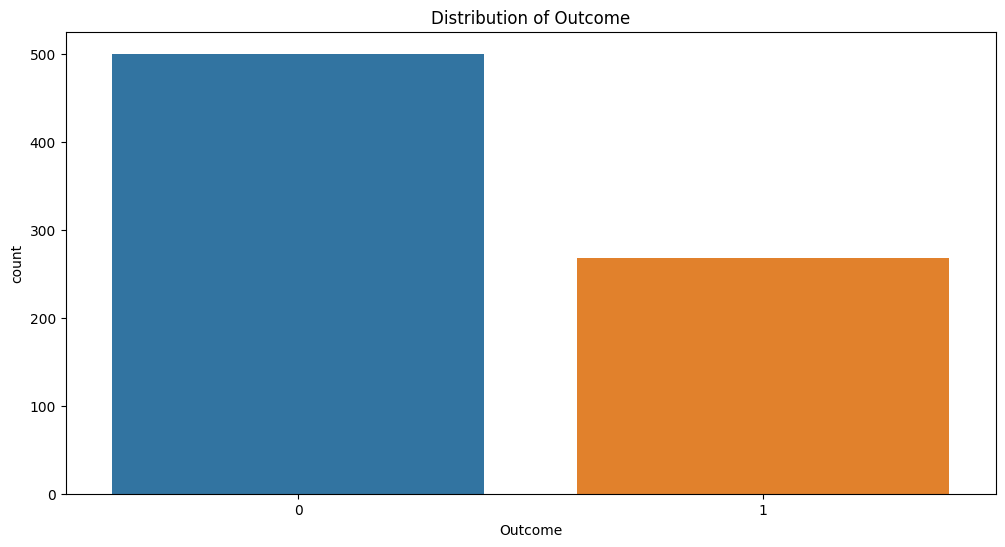

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a count plot for the 'Outcome' variable
plt.figure(figsize=(12, 6))
sns.countplot(x="Outcome", data=data)
plt.title('Distribution of Outcome')
plt.show()


## Visualizing Feature Distributions with Box Plots
The following code cell creates a 3x3 grid of box plots to visualize the distributions of selected features in the dataset. --> Outliners

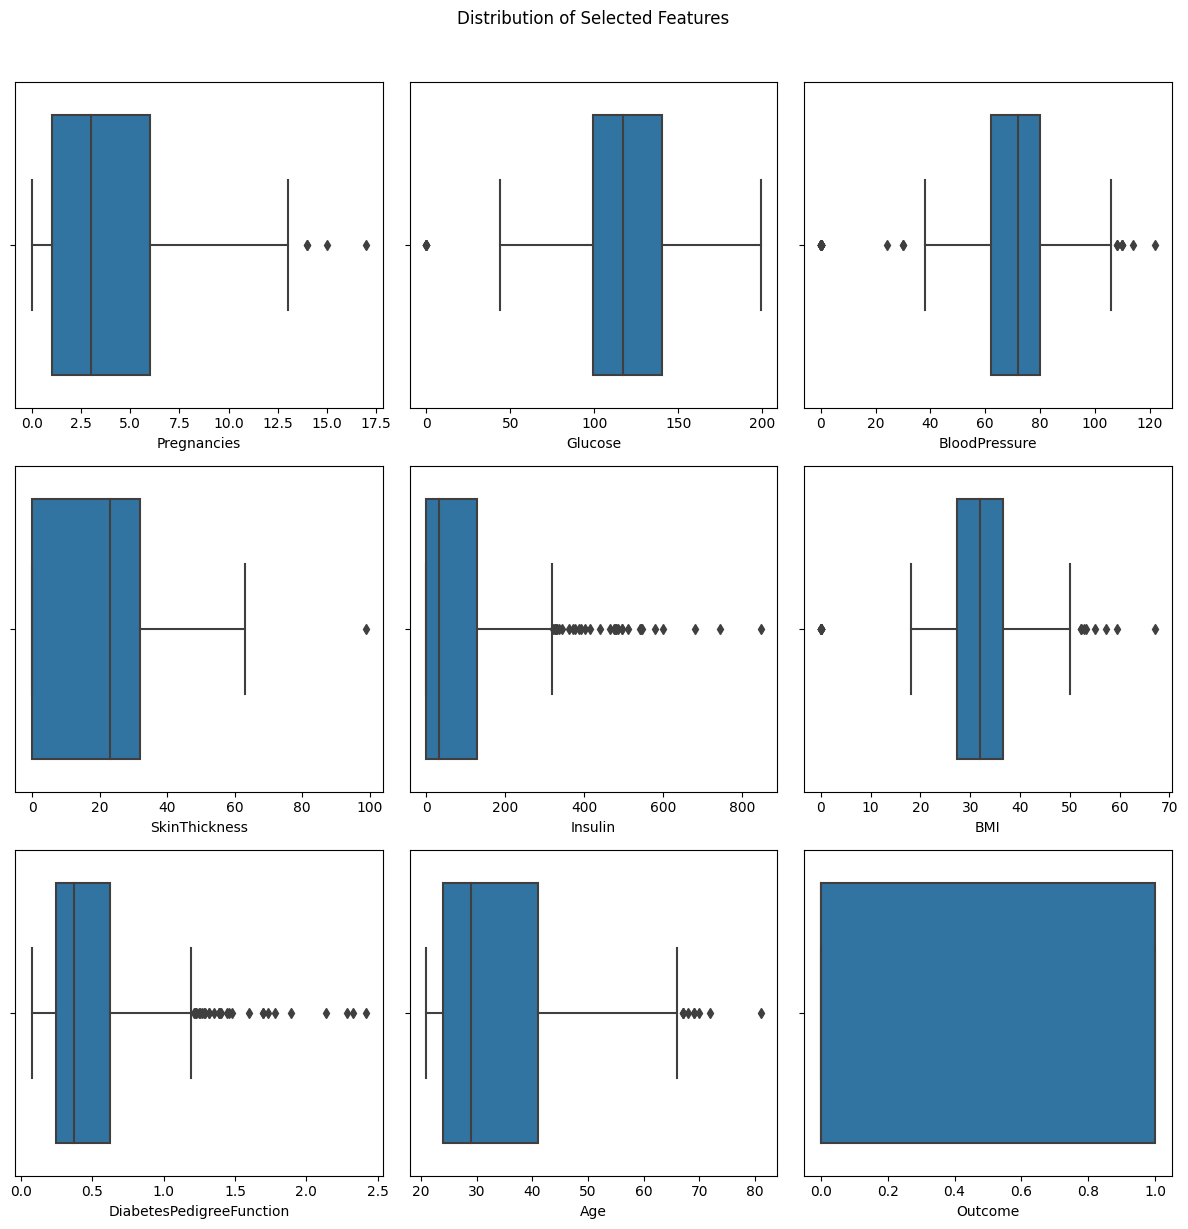

In [64]:
# Creating a 3x3 grid of box plots for selected features
plt.figure(figsize=(12, 12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=col, data=data)

plt.suptitle('Distribution of Selected Features', y=1.02)
plt.tight_layout()
plt.show()

## Pairwise Relationships with Pair Plot
The following code cell creates a pair plot to visualize pairwise relationships between features in the dataset, colored by the 'Outcome' variable.

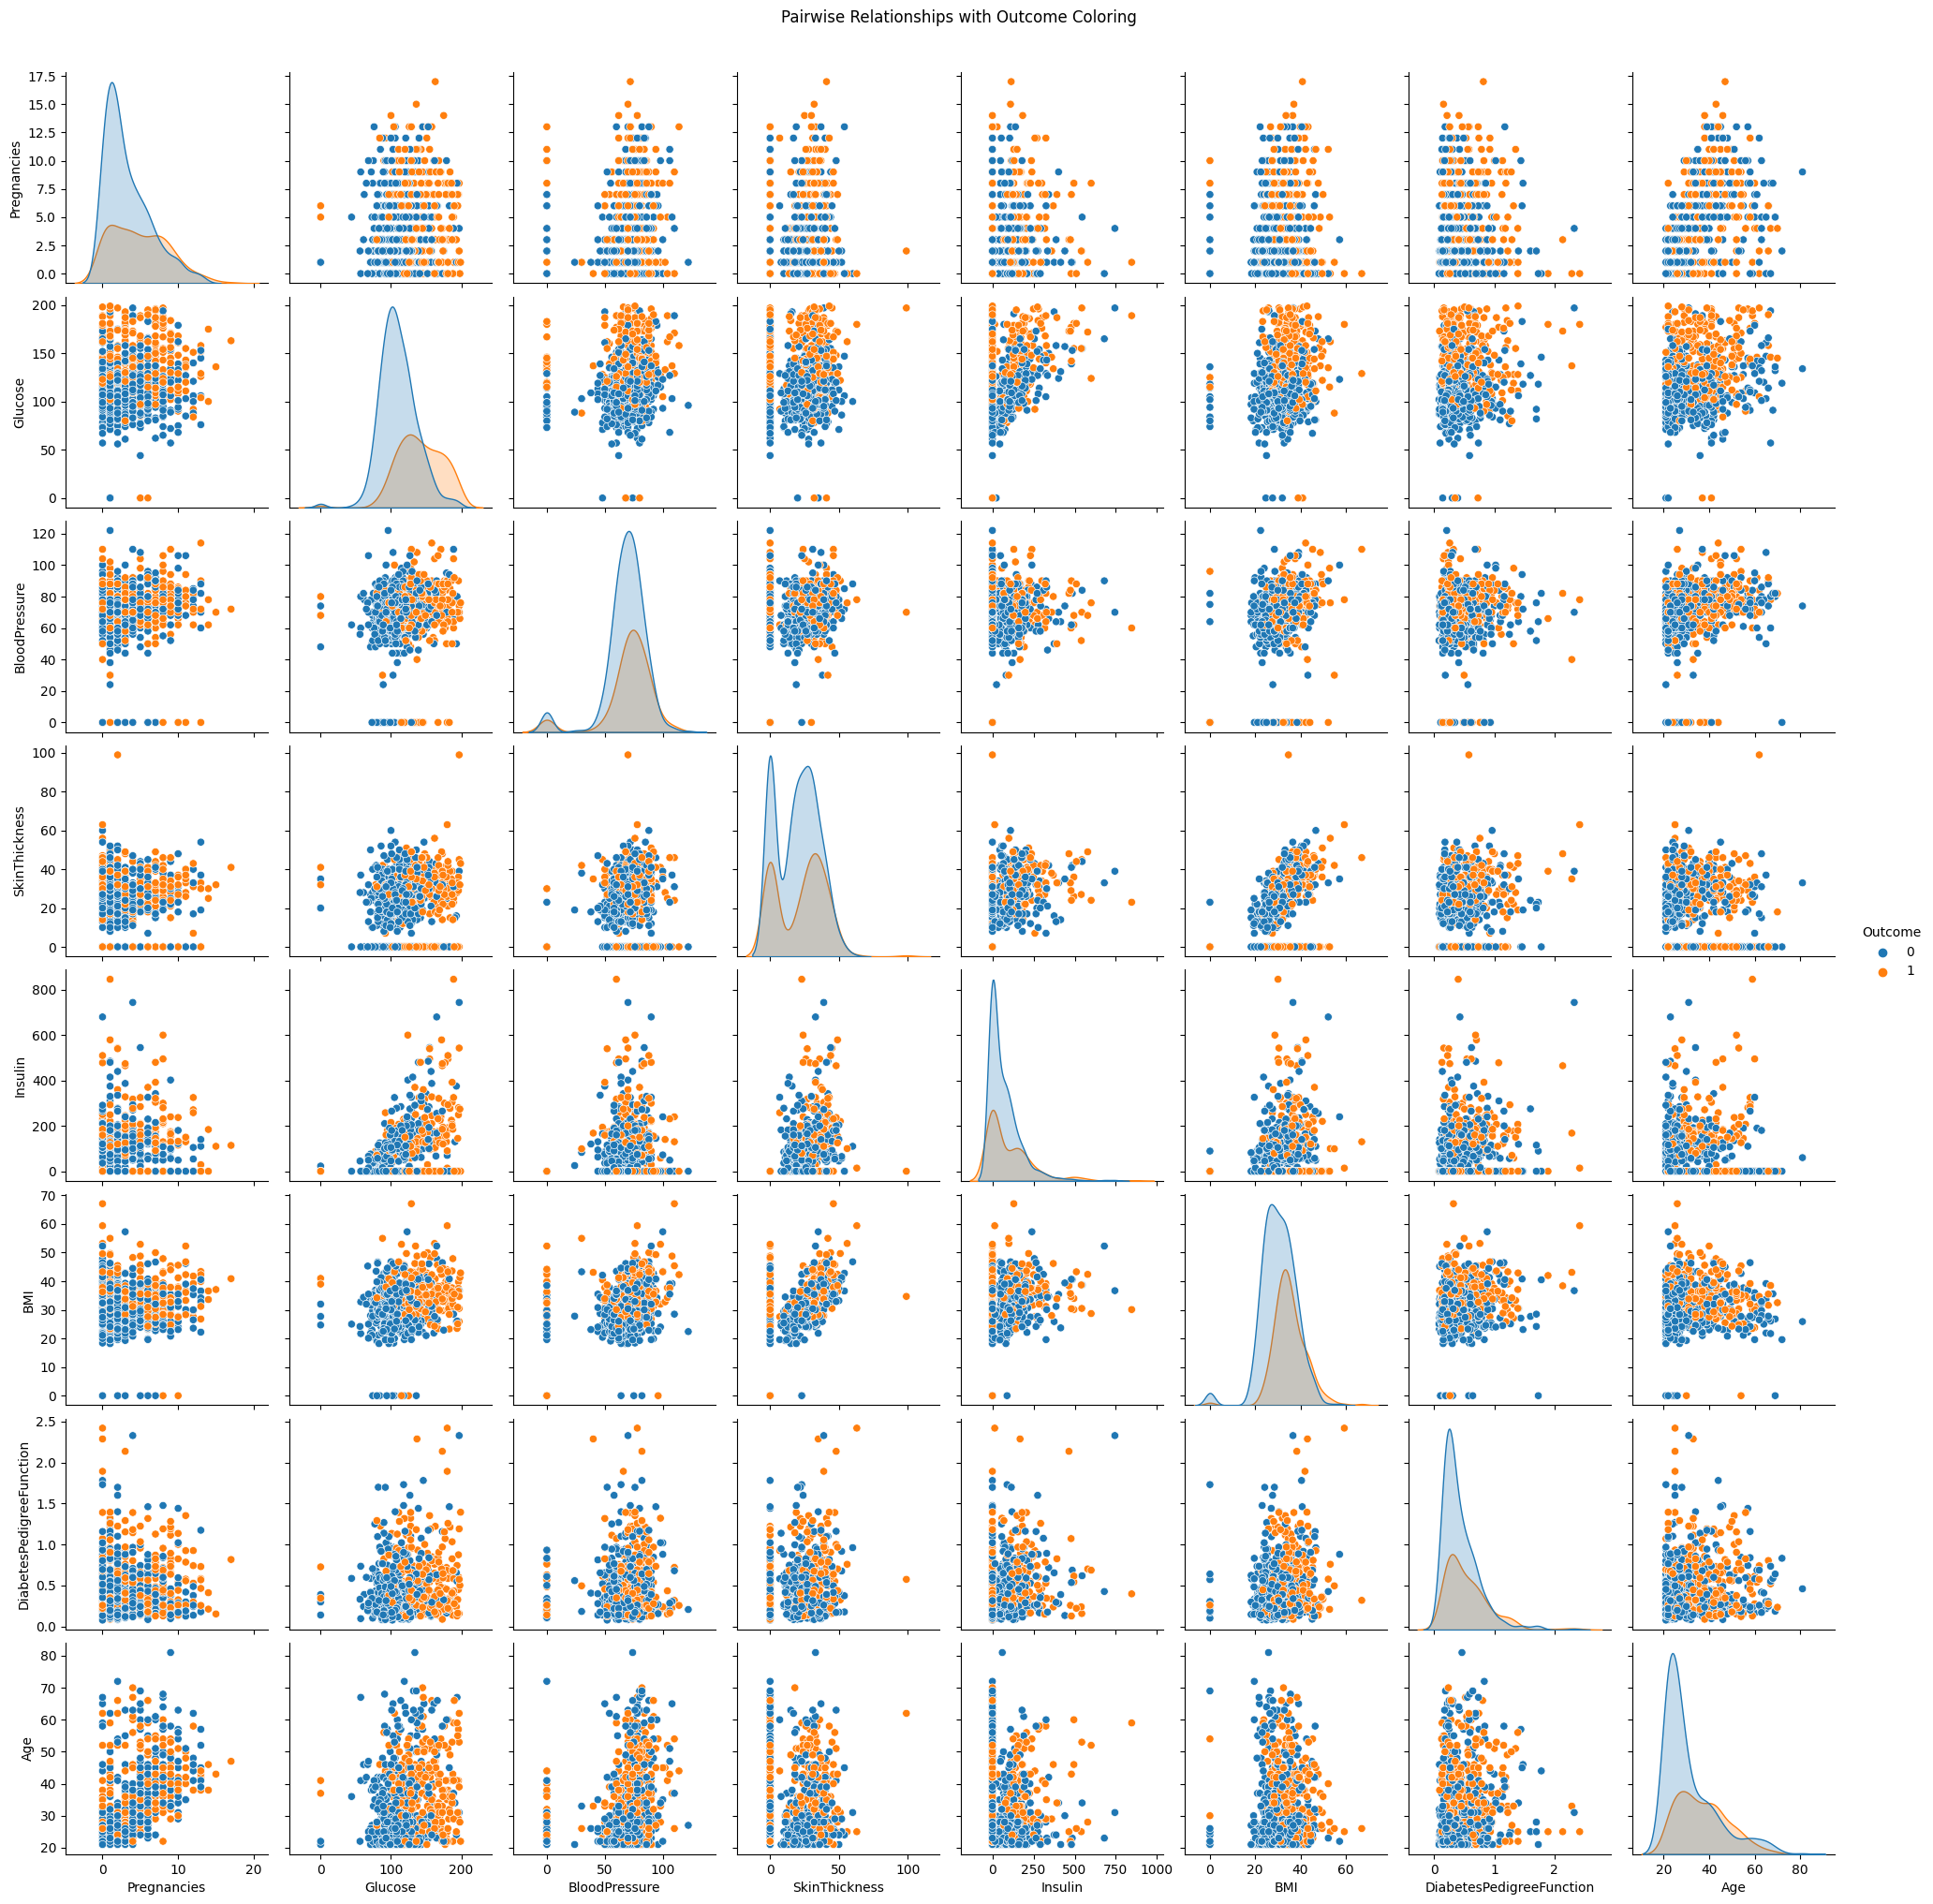

In [65]:
# Creating a pair plot for pairwise relationships colored by 'Outcome'
sns.pairplot(data, hue="Outcome")
plt.suptitle('Pairwise Relationships with Outcome Coloring', y=1.02)
plt.show()


## Histograms for Feature Distributions
The following code cell creates a 3x3 grid of histograms to visualize the distributions of selected features in the dataset.

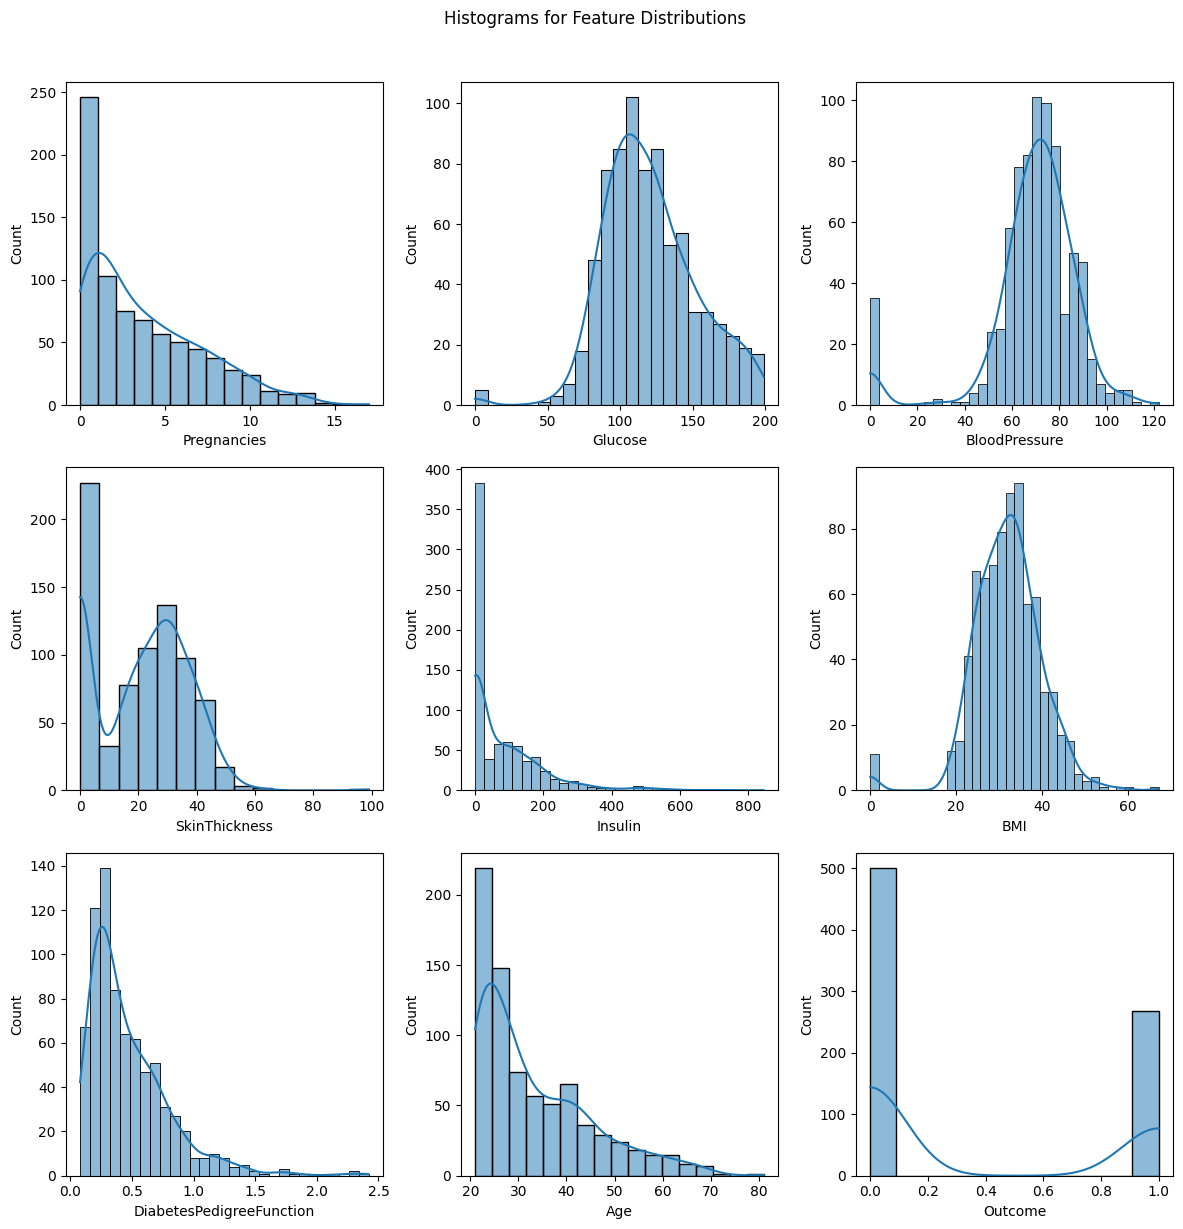

In [66]:
# Creating a 3x3 grid of histograms for selected features
plt.figure(figsize=(12, 12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(x=col, data=data, kde=True)

plt.suptitle('Histograms for Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()


## Correlation Heatmap
The following code cell creates a heatmap to visualize the correlation matrix of features in the dataset.

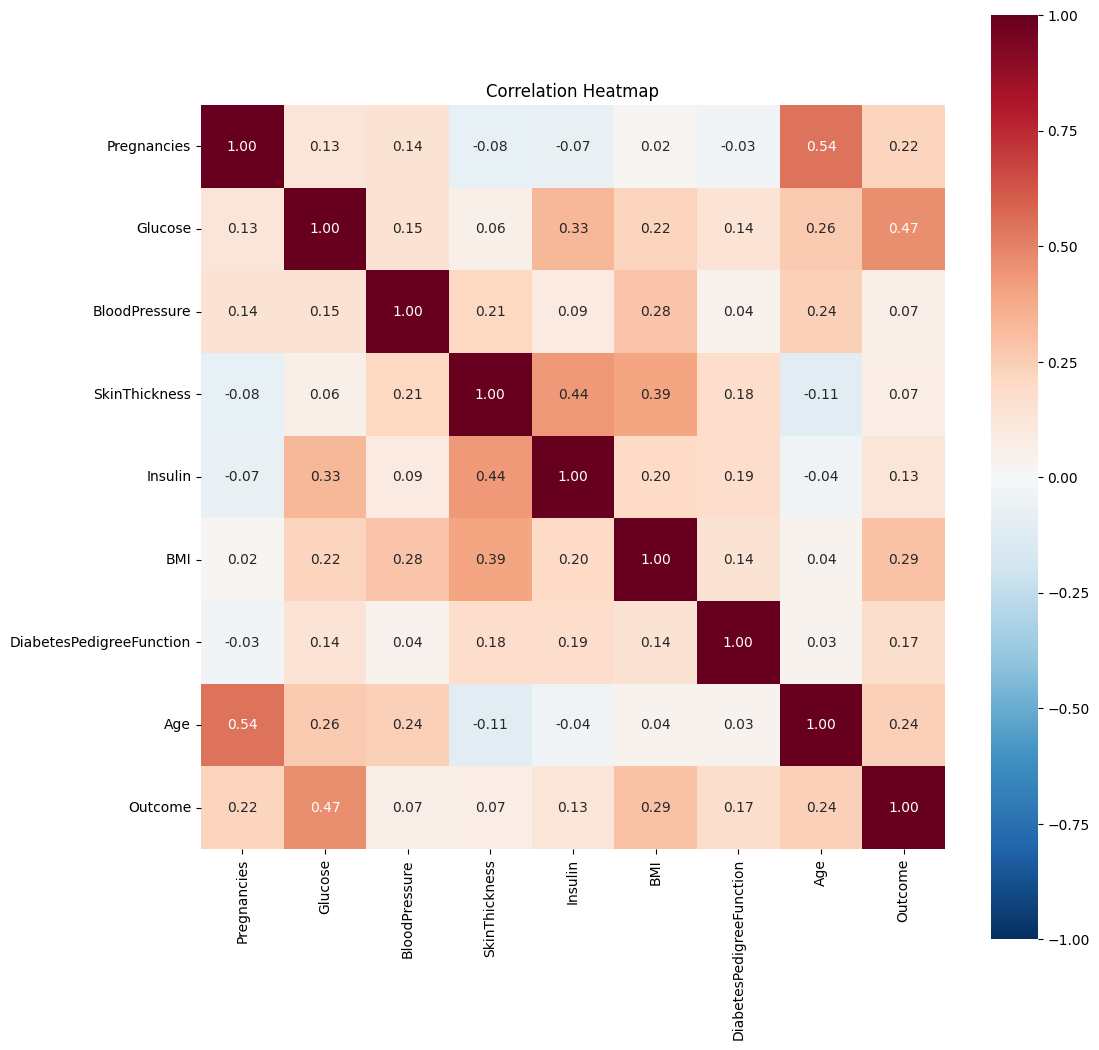

In [67]:
# Creating a heatmap for the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), vmin=-1.0, center=0, cmap="RdBu_r", annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


## Distribution of the Target Variable 'Outcome'
The following code cell generates a bar plot to visualize the distribution of the target variable 'Outcome' in the dataset.

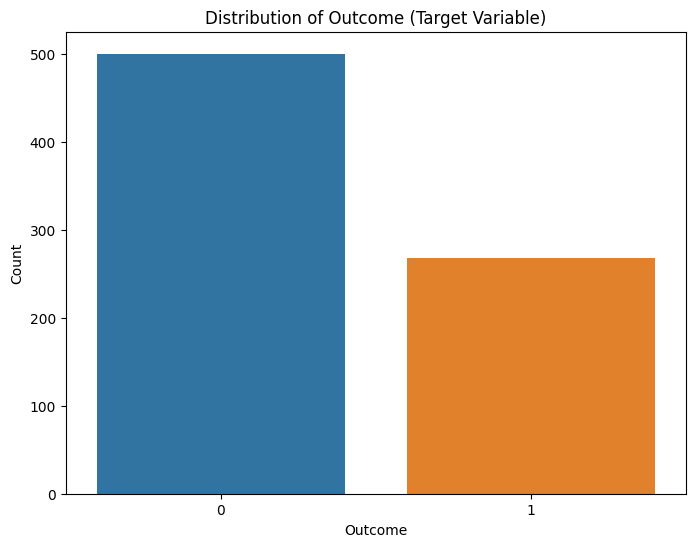

In [68]:
# Creating a bar plot for the distribution of the target variable 'Outcome'
plt.figure(figsize=(8, 6))
sns.countplot(x="Outcome", data=data)
plt.title('Distribution of Outcome (Target Variable)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


## Distribution of 'Age' by 'Outcome' - Violin Plot
The following code cell creates a violin plot to illustrate the distribution of the 'Age' feature for different values of the target variable 'Outcome'.

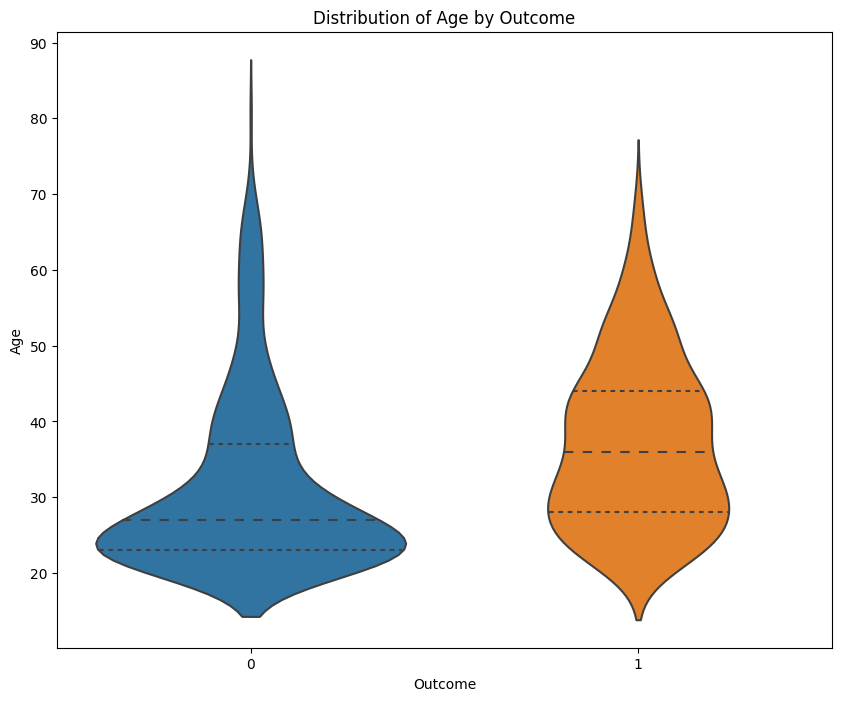

In [69]:
# Creating a violin plot for the distribution of 'Age' by 'Outcome'
plt.figure(figsize=(10, 8))
sns.violinplot(x="Outcome", y="Age", data=data, inner="quartile")
plt.title('Distribution of Age by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()


## Joint Plot for 'Glucose' and 'BMI'
The following code cell creates a joint plot to visualize the relationship between 'Glucose' and 'BMI'. The plot includes scatter plots, histograms, and a regression line.

<Figure size 800x800 with 0 Axes>

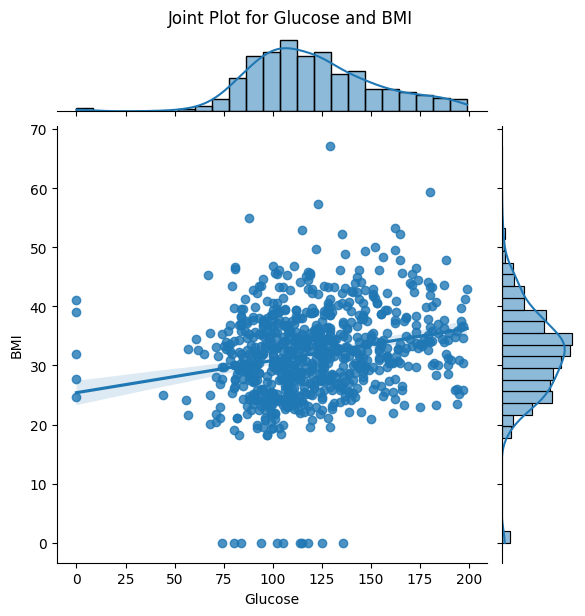

In [70]:

# Creating a joint plot for 'Glucose' and 'BMI'
plt.figure(figsize=(8, 8))
sns.jointplot(x="Glucose", y="BMI", data=data, kind="reg")
plt.suptitle('Joint Plot for Glucose and BMI', y=1.02)
plt.show()

## Count Plot for 'Pregnancies' by 'Outcome'
The following code cell creates a count plot to visualize the distribution of individuals with different numbers of pregnancies, grouped by the 'Outcome' variable.

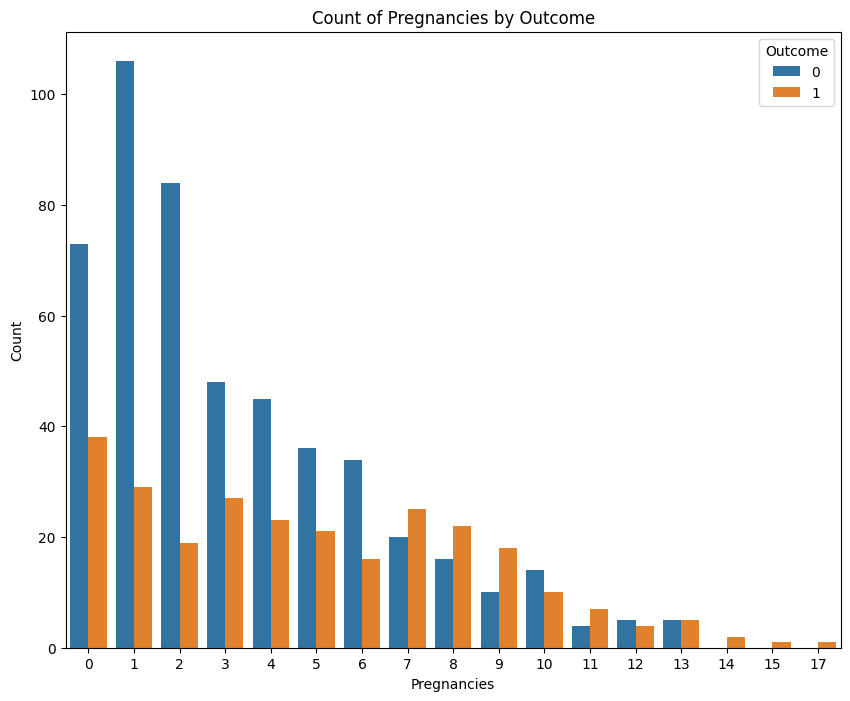

In [71]:
# Creating a count plot for 'Pregnancies' by 'Outcome'
plt.figure(figsize=(10, 8))
sns.countplot(x="Pregnancies", hue="Outcome", data=data)
plt.title('Count of Pregnancies by Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.show()


## KDE Plot for 'Insulin' by 'Outcome'
The provided code cell generates a Kernel Density Estimation (KDE) plot to illustrate the distribution of 'Insulin' for individuals with and without diabetes.

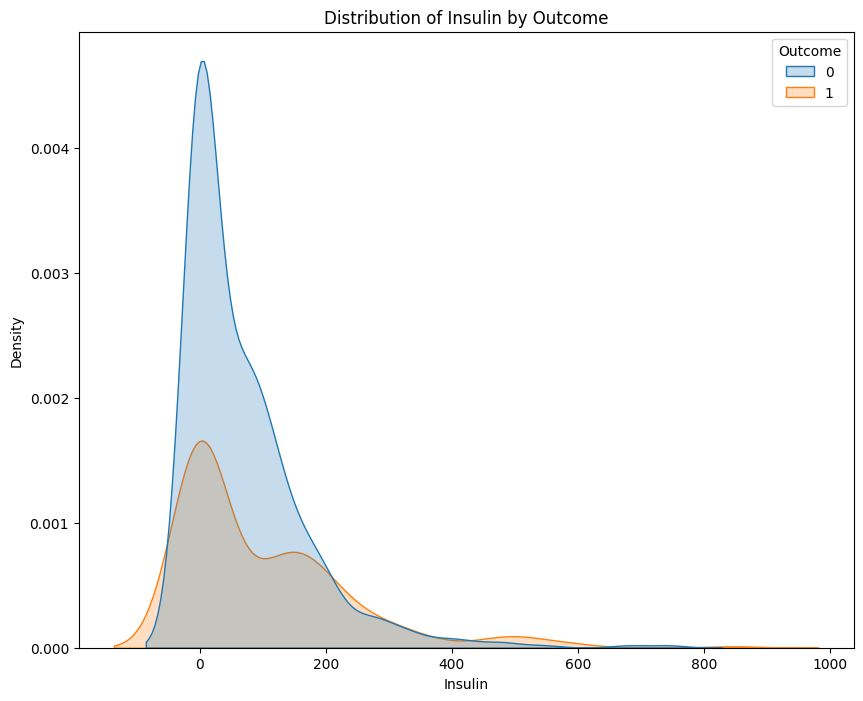

In [72]:
# Creating a KDE plot for 'Insulin' by 'Outcome'
plt.figure(figsize=(10, 8))
sns.kdeplot(x="Insulin", hue="Outcome", data=data, fill=True)
plt.title('Distribution of Insulin by Outcome')
plt.xlabel('Insulin')
plt.ylabel('Density')
plt.show()


# Model Training 

## Feature Scaling using StandardScaler
The following code cell performs feature scaling on the dataset using the StandardScaler from scikit-learn.
**Standard Scaling and Label Encoding**

In [73]:
# Creating a StandardScaler instance
sc_X = StandardScaler()

# Scaling the features and creating a new DataFrame 'X'
X = pd.DataFrame(sc_X.fit_transform(data.drop(['Outcome'], axis=1)),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


## Displaying Scaled Features
The following code cell displays the first few rows of the DataFrame containing the scaled features.

In [74]:
# Displaying the first few rows of the DataFrame with scaled features 'X'
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Extracting Target Variable 'Outcome'
The following code cell extracts the target variable 'Outcome' from the original dataset.

In [75]:
# Extracting the target variable 'Outcome' and assigning it to 'y'
y = data["Outcome"]


## Train-Test Split for Machine Learning
The following code cell splits the dataset into training and testing sets using the train_test_split function from scikit-learn.

In [76]:
# Importing train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## K-Nearest Neighbors Model Evaluation
The following code cell imports necessary libraries, creates a K-Nearest Neighbors (KNN) classifier, and evaluates its performance for different values of k.

In [77]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Creating a KNeighborsClassifier and evaluating performance for different values of k
test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    # Appending training and testing scores for later analysis
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))



## Identifying Optimal k - Maximum Training Score
The following code cell identifies the value of k that results in the maximum training score during K-Nearest Neighbors model evaluation.

In [78]:
# Finding the k with the maximum training score
max_train_score = max(train_scores)
train_score_index = [i + 1 for i, v in enumerate(train_scores) if v == max_train_score]

# Printing the results
print("Maximum Train Score: {:.2f}% for k = {}.".format(max_train_score * 100, train_score_index))



Maximum Train Score: 100.00% for k = [1].


## Identifying Optimal k - Maximum Testing Score
The following code cell identifies the value of k that results in the maximum testing score during K-Nearest Neighbors model evaluation.

In [79]:
# Finding the k with the maximum testing score
max_test_score = max(test_scores)
test_score_index = [i + 1 for i, v in enumerate(test_scores) if v == max_test_score]

# Printing the results
print("Maximum Test Score: {:.2f}% for k = {}.".format(max_test_score * 100, test_score_index))



Maximum Test Score: 77.92% for k = [13].


## K-Nearest Neighbors Model Evaluation and Visualization

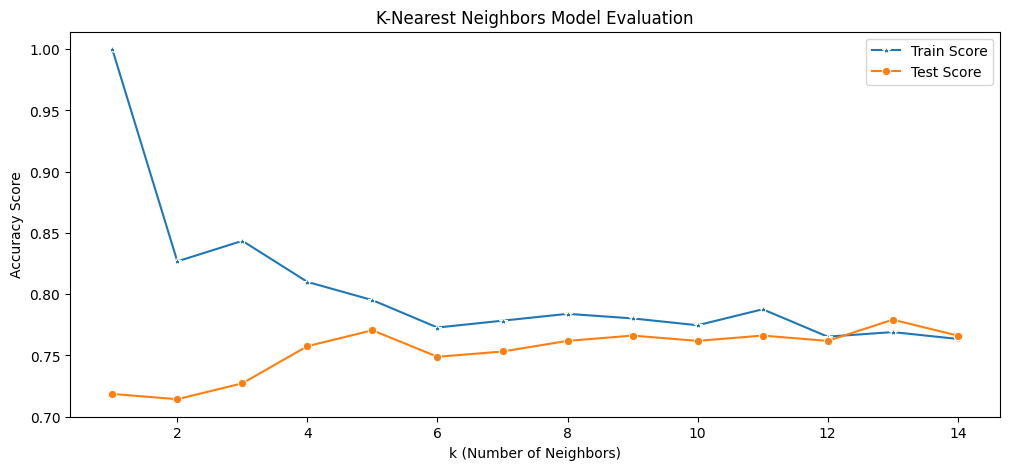

In [80]:
#
plt.figure(figsize=(12, 5))

# Plotting training scores
p_train = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label="Train Score")

# Plotting testing scores
p_test = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label="Test Score")

# Adding labels and title
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy Score')
plt.title('K-Nearest Neighbors Model Evaluation')

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()

## Evaluate K-Nearest Neighbors Model with k=13

The following code snippet creates a K-Nearest Neighbors (KNN) classifier with k=13, fits the model to the training data, and evaluates its accuracy on the testing data.

In [81]:
# Creating a KNeighborsClassifier with k=13
knn = KNeighborsClassifier(n_neighbors=13)

# Fitting the model to the training data
knn.fit(X_train, y_train)

# Calculating the accuracy score on the testing data
accuracy = knn.score(X_test, y_test)

# Printing the accuracy score
print("Accuracy on the testing data: {:.2f}%".format(accuracy * 100))



Accuracy on the testing data: 77.92%


## Confusion Matrix for K-Nearest Neighbors Model (k=13)

The following code calculates and displays the confusion matrix for a K-Nearest Neighbors (KNN) model with k=13, using predictions on the testing data.

In [82]:
#
from sklearn.metrics import confusion_matrix

# Assuming 'knn' is already defined
y_pred = knn.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix_result)


Confusion Matrix:
[[141  16]
 [ 35  39]]


## Classification Report for K-Nearest Neighbors Model (k=13)

The following code generates and prints a classification report for a K-Nearest Neighbors (KNN) model with k=13, based on predictions made on the testing data.

In [83]:
#
from sklearn.metrics import classification_report

# Assuming 'knn' is already defined
y_pred = knn.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)

# Printing the classification report
print("Classification Report:")
print(classification_report_result)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



# Conclusion

**Congratulations on completing the Diabetes Prediction Project!** 🎉 Throughout this journey, we explored the intricacies of the Pima Indians Diabetes Database, developed a machine learning model, and gained valuable insights into predicting diabetes.

## Key Highlights

- **Exploratory Data Analysis (EDA):** Visualizations such as histograms, box plots, and heatmaps provided a deep understanding of the dataset's features and relationships.

- **Data Preprocessing:** We ensured the data was ready for modeling by handling missing values, scaling features, and creating training and testing sets.

- **Model Selection:** The *K-Nearest Neighbors (KNN)* algorithm was chosen for its effectiveness in predicting diabetes. We fine-tuned the model by exploring different values of 'k' and evaluating performance.

- **Visualizations:** Various plots, including count plots, bar plots, and kernel density estimation plots, enhanced our interpretation of the dataset and model outcomes.

## Next Steps

- **Further Exploration:** Consider exploring additional models or fine-tuning parameters for continuous improvement.

- **Deployment:** If applicable, deploy the trained model to make predictions on new data.

- **Documentation:** Document your findings, insights, and the steps taken during the project for future reference.

Thank you for joining us on this exciting venture into the world of machine learning and diabetes prediction. Wishing you continued success in your data science endeavors! 🚀
